In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from warnings import filterwarnings
filterwarnings('ignore')

## PART-A ( Concept Based)--25 points

In [3]:
l=[57, 61, 57,57 ,58, 57, 61, 54, 68,
51, 49, 64, 50, 48, 65,52, 56, 46,
54, 49, 50, 47, 55, 55, 54, 42, 51,
56, 55, 54, 51, 60, 62, 43, 55, 56,
61, 52, 69, 64, 46, 54]
df=pd.DataFrame({'age':l})
df.head()

,age
0,57
1,61
2,57
3,57
4,58


## Q1. Compute the mean, median and the mode of the data

In [3]:
# mean
mean=df['age'].mean()
print('Mean of the age is ',mean)

# median
median=df['age'].median()
print('Median of the age is ',median)

# mode
mode=df['age'].mode()[0]
print('Mode of the age is ',mode)

Mean of the age is  54.904761904761905
Median of the age is  55.0
Mode of the age is  54


## Q2. Compute the range , variance and standard deviation of CEO ages

In [6]:
# range
ran =df['age'].max()-df['age'].min()
print('The range is ',ran)

# variance
variance=df['age'].var()
print('The variance is ',variance)

# standard deviation
std=df['age'].std()
print('The standard deviation is ',std)

The range is  27
The variance is  39.4541231126597
The standard deviation is  6.2812517154353635


## Q3. Find the mean deviation for the data .

In [8]:
# mean deviation
n=len(df)
x_bar=np.mean(df['age'])
md= sum(np.abs(df['age']-x_bar)/n)
print('The Mean Deviation is ',md)

The Mean Deviation is  4.8140589569160985


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data


In [10]:
s=df['age'].std()
md=df['age'].median()
skewness=(3*(mean-md))/s
print('The skewness of the data is ',skewness)

The skewness of the data is  -0.04548683903435661


## Q5. Count the number of data values that fall within two standard deviations ofthe mean. Compare this with the answer from Chebyshev’s Theorem.

In [11]:
left_standard_deviation = mean-2*std
right_standard_deviation=mean+2*std
fall_values=df[(df['age']>=left_standard_deviation)&(df['age']<=right_standard_deviation)]
count=len(fall_values)
print(count,'data values that fall within two standard deviations of the mean')

39 data values that fall within two standard deviations of the mean


In [12]:
percentage=(count/len(df))*100
print(round(percentage,3), 'percentage of data values that fall within two standard deviations  of the mean')

92.857 percentage of data values that fall within two standard deviations  of the mean


## Q6. Find the three quartiles and the interquartile range (IQR).

In [11]:
Q1=df['age'].quantile(0.25)
Q2=df['age'].quantile(0.50)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print('The First Quantile  is ',Q1)
print('The Second Quantile is ',Q2)
print('The Third Quantile  is ',Q3)
print('The Inter Quantile Range is ',IQR)

The First Quantile  is  51.0
The Second Quantile is  55.0
The Third Quantile  is  57.75
The Inter Quantile Range is  6.75


## Q7. Are there any outliers in the data set ?

In [12]:
UL=Q3+(1.5*IQR)
LL=Q1-(1.5*IQR)
df[(df['age']<LL)|(df['age']>UL)]

,age
8,68
38,69


## Q8. Draw a boxplot of the dataset to confirm .

<AxesSubplot:xlabel='age'>

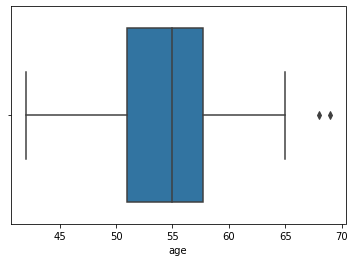

In [13]:
sns.boxplot(data=df,x='age')

## Q9. Find the percentile rank of the datapoint 50.

In [13]:
df['rank']=(df['age'].rank(pct=True))*100
df[df['age']==50]

,age,rank
12,50,22.619048
20,50,22.619048


## Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [19]:
l=len(df[df['age']<50])
probability=(l/len(df))
print("The probability that a person becoming a CEO below 50 years of age is\n ",probability)

The probability that a person becoming a CEO below 50 years of age is
  0.19047619047619047


## Q11. Create a frequency distribution for the data and visualize it appropriately

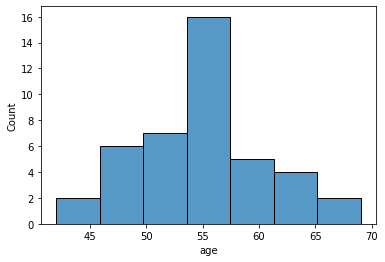

In [16]:
sns.histplot(data=df,x='age')
plt.show()

## Q12.Create a probability distribution of the data and visualize it appropriately

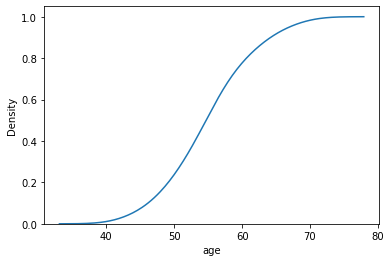

In [15]:
sns.kdeplot(df['age'],cumulative=True)
plt.show()

## Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?


In [9]:
# shape of the distribution of the dataset
df.shape

(42, 1)

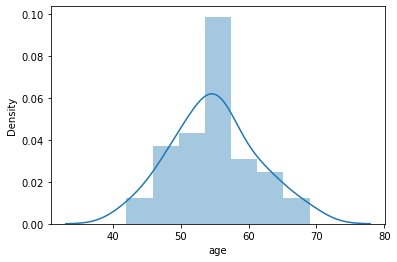

In [10]:
sns.distplot(df['age'])
plt.show()

In [12]:
def sampling_distribution(data,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(100):
        sample=random.choices(data,k=sample_size)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list

Text(0.5, 1.0, 'sample size = 30')

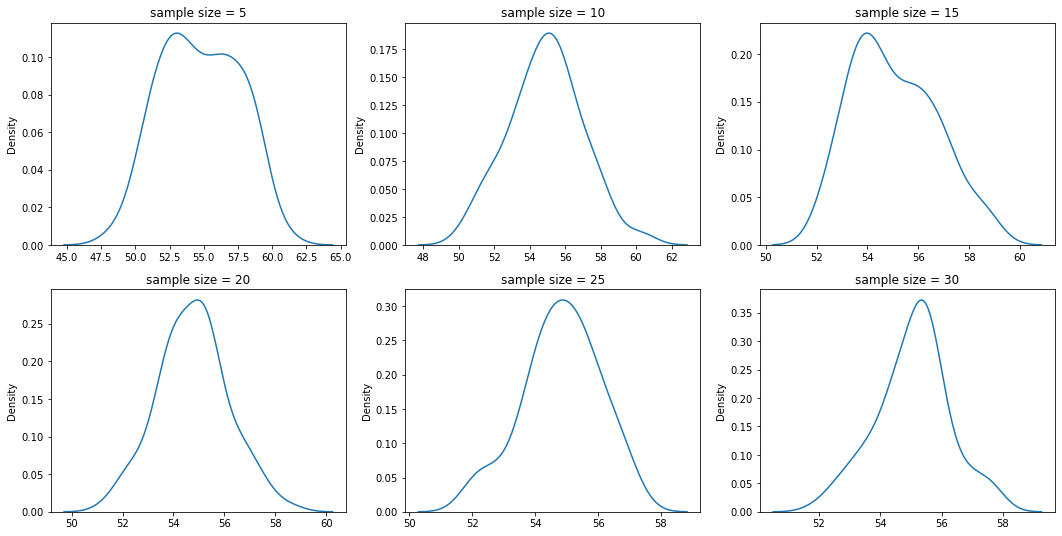

In [13]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['age'],100,5))
plt.title('sample size = 5')
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['age'],100,10))
plt.title('sample size = 10')
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['age'],100,15))
plt.title('sample size = 15')
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['age'],100,20))
plt.title('sample size = 20')
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['age'],100,25))
plt.title('sample size = 25')
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['age'],100,30))
plt.title('sample size = 30')

## Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years  of age?

In [5]:
x=len(df[df['age']>50])
n=10
p=x/len(df)
prob=stats.binom.pmf(6,n,p)
print("The probability that a person becoming a CEO below 50 years of age is/n ",prob)

The probability that a person becoming a CEO below 50 years of age is/n  0.13201590604140495


## Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.

In [25]:
fav_outcomes=len(df[df['age']>50])
n=300
p=fav_outcomes/len(df)
x=75
print(f"The probability that out of a random sample of 300 CEO exactly 75 are above 50 years of age is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 300 CEO exactly 75 are above 50 years of age is 7.989183282399959e-78


## Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( Statereasons as to why did you use a z or t distribution)

In [24]:
# alpha
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)

# me
x_bar=np.mean(df['age'])
sigma=np.std(df['age'])
n=len(df)
me=(z_alpha*sigma)/(np.sqrt(n))

# confidence interval
CI=(x_bar-me),(x_bar+me)
print('Confidence inteval for population of of CEOs buyers is:\n ',CI)

Confidence inteval for population of of CEOs buyers is:
  (53.027880088848484, 56.781643720675326)


## Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs of Fortune 500 companies are above 60 years in the population. Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [25]:
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.02
p=0.25
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  1801


## Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident  and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [26]:
c=0.90
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.05
p=0.25
q=1-p

# sample size
n=(z_alpha*((np.sqrt(p*q))/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  203


## Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 years.

In [27]:
# hypothesis testing
# ho:mu=0.25
# ha:mu<>0.25
    
# decison criteria
alpha=0.05
z_alpha=stats.norm.isf(alpha/2)

# sample statistics
p_bar=0.25
n=30
p=10/30
q=1-p
z=(p-p_bar)/(np.sqrt((p_bar*(1-p_bar))/n))
print(' z_alpha is ',round(z_alpha,3))
print(' z is ',round(z,3))

 z_alpha is  1.96
 z is  1.054


## Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:

In [14]:
uk=[47, 49, 73, 50, 65, 70, 49, 47, 40, 43,46, 35, 38, 40, 47, 39, 49, 37, 37, 36,40, 37, 31, 48, 48, 45, 52, 38, 38, 36,
    44, 40, 48, 45, 45, 36, 39, 44, 52, 47]
usa=[47, 57, 52, 47, 48, 56, 56 ,52 ,50, 40,46, 43, 44, 51, 36, 42, 49, 49, 40, 43,39 ,39 ,22, 41, 45, 46, 39 ,32 ,36, 32,
    32, 32, 37, 33, 44, 49, 44, 44, 49, 32]

## a. What are your hypotheses?

## b. What significance level will you use?`

## c. What statistical test will you use?

### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [30]:
# decision criteria
alpha=0.05
z_alpha=stats.norm.isf(alpha)
print('The z_alpha is ',z_alpha)

# sample statistics
x1=np.mean(uk)
x2=np.mean(usa)
s1=8.8
s2=7.8
n1=40
n2=40
z=(x1-x2)/np.sqrt(((s1**2)/n1)+((s2**2)/n2))
print('The z value is ',z)


The z_alpha is  1.6448536269514729
The z value is  1.0084435261263631


## e. What is your decision?

## f. What can you conclude?

## g. Do you feel that using the data given really answers the original question asked?

## h. What other data might be used to answer the question?

# PART-B ( Dataset Based)
## Topic-Credit Card Fraud Detection


## 1. Import the dataset and view the first 10 rows of it.


In [67]:
df=pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## 2. Display shape/dimension of the dataset.


In [68]:
# shape
df.shape

(284807, 31)

In [69]:
# dimension
df.ndim

2

## 3. Check for the missing values.Display number of missing values per column

In [70]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 4. Check the datatype, number of non-null values and name of each variablein the dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 5. Check if there are any non-real characters in the dataset

In [73]:
real=np.isreal(df).sum()
real

8829017

In [74]:
~df.applymap(np.isreal)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
non_real=(df.shape[0]*df.shape[1])-real
non_real

0

In [76]:
# There are no non real values in the dataset

## 6. Check the descriptive statistics of the dataset.

In [77]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 7. Check the number of fraudulent transactions in the dataset and visualizeusing pie chart and bar plot.

In [78]:
fraudulent=df[df['Class']==1]
print('The number of fraudulent transactions in the dataset  ',len(fraudulent))

The number of fraudulent transactions in the dataset   492


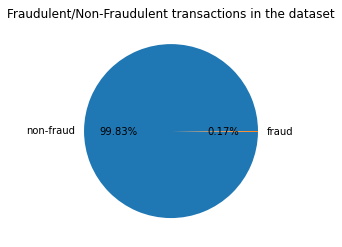

In [79]:
plt.pie(df['Class'].value_counts(),autopct='%.2f%%',labels=['non-fraud','fraud'])
plt.title('Fraudulent/Non-Fraudulent transactions in the dataset')
plt.show()

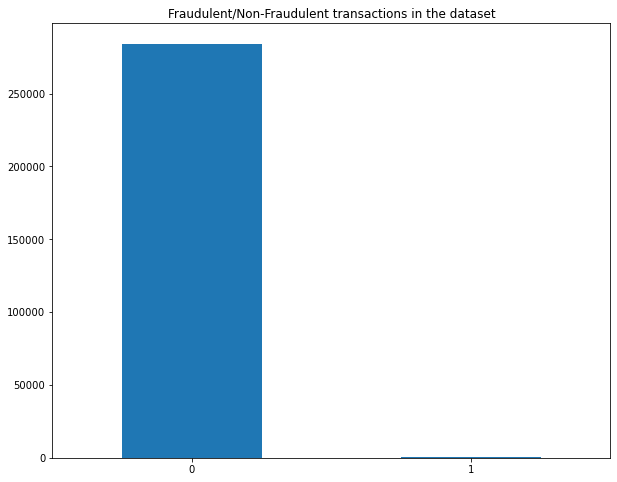

In [80]:
plt.figure(figsize=(10,8))
df['Class'].value_counts().plot(kind='bar',rot=0)
plt.title('Fraudulent/Non-Fraudulent transactions in the dataset')
plt.show()

## 8. Check the maximum and minimum fraudulent amount.

In [81]:
# maximum fraudulent amount

df[df['Class']==1]['Amount'].max()

2125.87

In [82]:
# minimum fraudulent amount

df[df['Class']==1]['Amount'].min()

0.0

## 9. Check the number of transactions where the transaction amount is zero and consider as a fraud transaction.

In [83]:
T_zero=len(df[(df['Class']==1)& (df['Amount']==0.0)])
print(f"The number of transactions where the transaction amount is zeroand consider as a fraud transaction = {T_zero} ")

The number of transactions where the transaction amount is zeroand consider as a fraud transaction = 27 


## 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

In [84]:
normally_distributed=[]
not_normally_distributed=[]
for i in df.columns:
    s=df[i].skew()
    if -0.5<s<0.5:
        normally_distributed.append(i)
    else:
        not_normally_distributed.append(i)
print('The normally distributed columns are :\n ',normally_distributed)
print('The not normally distributed columns are :\n ',not_normally_distributed)

The normally distributed columns are :
  ['Time', 'V11', 'V13', 'V15', 'V18', 'V19', 'V22', 'V25']
The not normally distributed columns are :
  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28', 'Amount', 'Class']


## 11. List down columns that are highly skewed.

In [85]:
highly_skewed=[]
for i in df.columns:
    s=df[i].skew()
    if (s<=-1)or (s>=1):
        highly_skewed.append(i)
print('The highly skewed distributed columns are : ',highly_skewed)

The highly skewed distributed columns are :  ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount', 'Class']


## 12. With the help of a standard scaler, normalize the respective column distribution.

In [86]:
dfn=df.copy()

In [87]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()  
for i in highly_skewed:
    dfn[i]=ss.fit_transform(df[[i]])
dfn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,1.378155,-0.245117,0.347068,0.193679,0.082637,0.363787,...,-0.024923,0.277838,-0.176911,0.066928,0.128539,-0.189115,0.330892,-0.063781,0.244964,-0.041599
1,0.0,0.608496,0.161176,0.109797,0.448154,0.043483,-0.061820,-0.063700,0.071253,-0.255425,...,-0.307377,-0.638672,0.162201,-0.339846,0.167170,0.125895,-0.022256,0.044608,-0.342475,-0.041599
2,1.0,-0.693500,-0.811578,1.169468,0.379780,-0.364572,1.351454,0.639776,0.207373,-1.514654,...,0.337632,0.771679,1.456320,-0.689281,-0.327642,-0.139097,-0.137137,-0.181021,1.160686,-0.041599
3,1.0,-0.493325,-0.112169,1.182516,-0.863291,-0.007469,0.936150,0.192071,0.316018,-1.387024,...,-0.147443,0.005274,-0.304777,-1.175575,0.647376,-0.221929,0.155396,0.186189,0.140534,-0.041599
4,2.0,-0.591330,0.531541,1.021412,0.403034,-0.295015,0.071999,0.479302,-0.226510,0.817739,...,-0.012839,0.798278,-0.220123,0.141267,-0.206010,0.502292,0.543620,0.651816,-0.073403,-0.041599


## 13. List down columns that have high kurtosis.

In [88]:
highly_kurtosis=[]
for i in df.columns:
    k=df[i].kurt()
    if (k<=-1) or (k>=1):
        highly_kurtosis.append(i)
print('Columns that have  high kurtosis  are :\n',highly_kurtosis)

Columns that have  high kurtosis  are :
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27', 'V28', 'Amount', 'Class']


## 14. What is the distribution of Time and Amount columns in the dataset ?

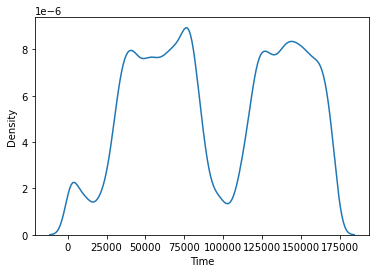

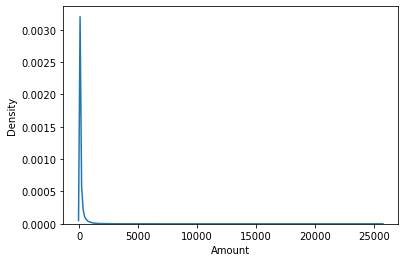

In [89]:
sns.kdeplot(data=df,x='Time')
plt.show()
sns.kdeplot(data=df,x='Amount')
plt.show()

The Time column has almost a symmetric distribution, while the Amount column is highly right skewed

## 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.


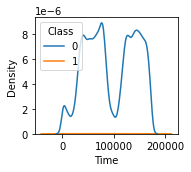

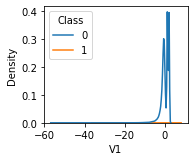

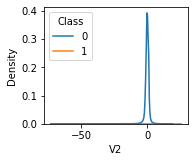

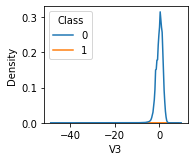

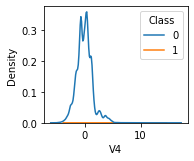

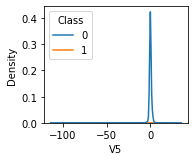

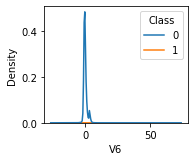

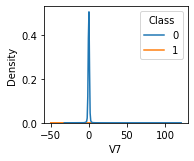

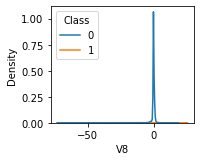

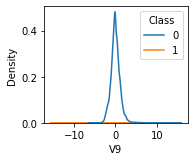

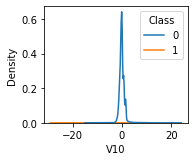

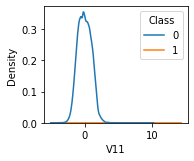

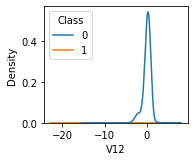

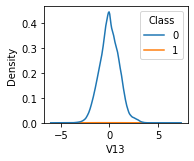

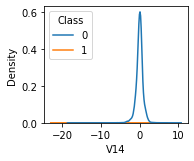

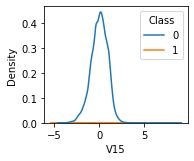

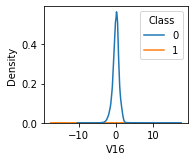

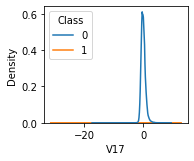

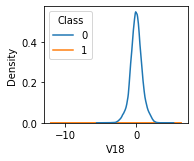

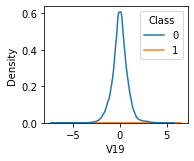

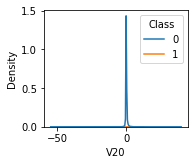

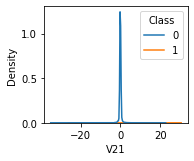

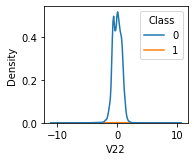

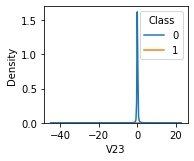

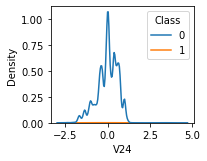

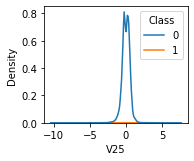

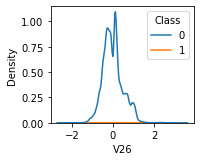

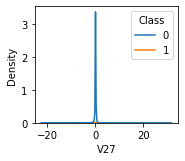

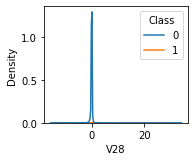

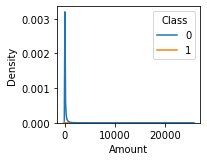

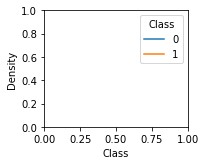

In [90]:
for i,j in zip(range(1,32),df.columns):
    plt.figure(figsize=(18,15))
    plt.subplot(6,6,i)
    sns.kdeplot(x=df[j],hue=df["Class"])
plt.show()

## 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

In [92]:
a=df['Class'].value_counts(normalize =True)*100
a

0    99.827251
1     0.172749
Name: Class, dtype: float64

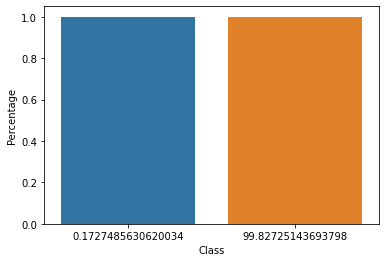

In [93]:
sns.countplot(x=a)
plt.ylabel('Percentage')
plt.show()

## 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).

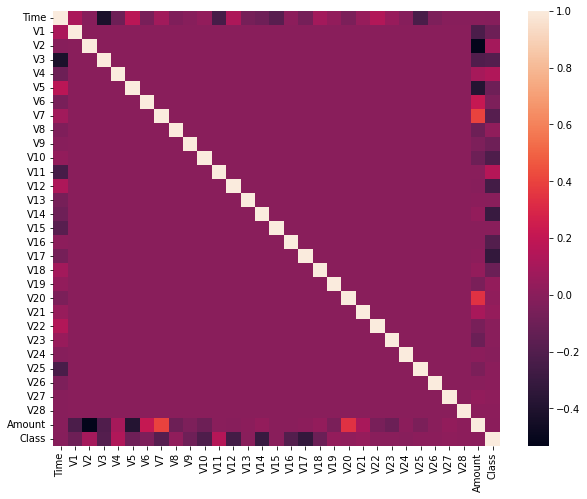

In [34]:
plt.figure(figsize=(10,8))                #doubt
sns.heatmap(df.corr())
plt.show()

In [37]:
round(df.corr(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


 There are no strong correaltion between the columns

## 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions?

In [101]:
# testing hypothesis
# ho:muf-mun<=0
# ha: muf-mun>0

# decision criteria
alpha=0.05
z_alpha=stats.norm.isf(alpha)
print('z_alpha is ',round(z_alpha,3))

# data seperation
fraud=df[df['Class']==1]['Amount']
normal=df[df['Class']==0]['Amount']

# simple statistics
x1=np.mean(fraud)
x2=np.mean(normal)
s1=np.std(fraud,ddof=1)
s2=np.std(normal,ddof=1)
n1=len(fraud)
n2=len(normal)
z=(x1-x2)/(np.sqrt(((s1**2)/n1)+((s2**2)/n2)))
print('z is ',round(z,3))

# p_value
p_value=stats.norm.sf(z)
print('p_value is ',round(p_value,3))
print('alpha is ',round(alpha,3))

z_alpha is  1.645
z is  2.929
p_value is  0.002
alpha is  0.05


## 19. Perform ANOVA test for Statistical feature selection.


In [ ]:
# hypothesis testing                               #doubt
# f_stats,p_value=stats.f_oneway(df.columns,df.columns)

In [ ]:
df.head()

## 20. Split the dataset randomly into train and test datasets. Use a train -testratio of 70:30 ratio.

In [39]:
from sklearn.model_selection import train_test_split
y=df['Amount']
x=df.drop('Amount',axis=1)

In [40]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.7)
print("Shape of train_x: ", train_x.shape)
print("Shape of test_x: ", test_x.shape)
print("Shape of train_y: ", train_y.shape)
print("Shape of test_y: ", test_y.shape)

Shape of train_x:  (199364, 30)
Shape of test_x:  (85443, 30)
Shape of train_y:  (199364,)
Shape of test_y:  (85443,)


## 21. These are just checkpoints. Please use your best analytical approach to build thisreport. You can mix match columns to create new ones which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. You can use the following as checklist pointers :
